# [Lab Session 2](otsu.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**[Task 1.1.]()** Load the image:

In [2]:
imgf = plt.imread('data/NIH3T3/im/dna-0.png')

**[Task 1.2.]()** Quantify the image into 256 bins:

In [3]:
img8 = (imgf*255).round().astype(np.uint8)
#Python fängt an bei 0 zu zählen deshalb gibt es intensitäten von 0 - 255 genau 256 bins 
#er soll runden und es in einen Integer in 8 bits umschreiben 

**[Task 1.3.]()** Compute the image histogram:

In [4]:
h = np.zeros(256)

for i in range(0,256):
    a = img8 == i 
    h[i]= a.sum()

#also als erstes wird ein Vektor mit 256 einträgen erstellt der leer ist 
# dann machen wir eine Schleife die über die Intensitätswerte 0 - 255 interiert 
# für jede intensität wird dann in a ein vektor erstellt mit TRUE oder FLASE Werten und jedes Pixel des Bildes wird im endeffekt durchgelaufen 
# dann speichere ich an der entsprechenden stelle in dem leeren Vektor h die Summe , also ich zähle dann alle TRUE werte zusammen und das ergibt eine Zahl wie viele Pixel diese Intensität haben 


Show the computed histogram:

<BarContainer object of 256 artists>

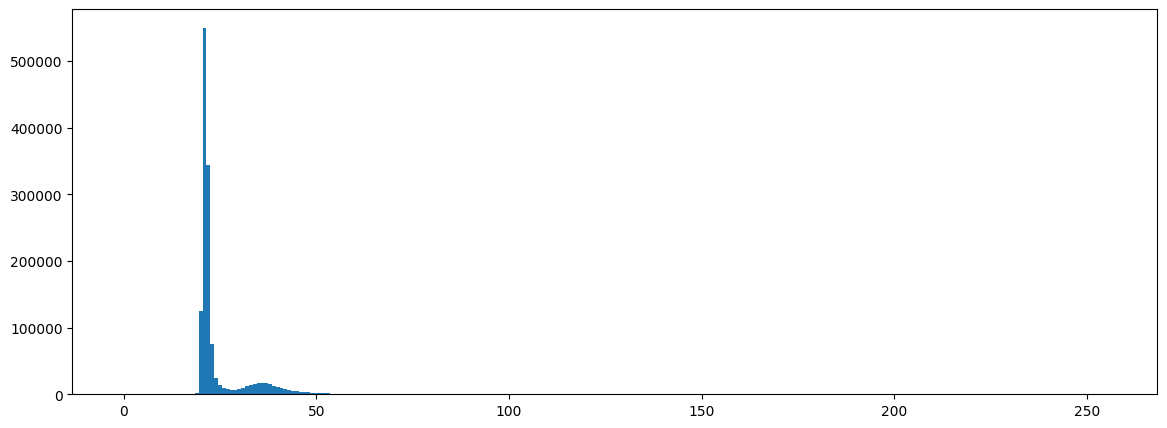

In [5]:
plt.figure(figsize=(14,5))
plt.bar(range(256), h, width=1)
# bei plt.bar(x,y)-> immer erst die x-Achse und dann y-Achse

**[Task 1.4.]()** Implement the method of Otsu:

In [6]:
#dividing the image into multiple regions or segments 
# Otsu speperates image in two classes -> foreground and background based on grayscale intensity values 
# we need to calculate a threshold that divides the pic in 2 sections and the varaince between those sections needs to be really big 
# meaning the values of the two classes is very different 

all_thres = np.zeros(256)

for T in range (0,256):
    n1 = sum(h[:T])
    sigma1 = np.var(img8[img8 < T])
    
    n2 = sum(h[T:256])
    sigma2 = np.var(img8[img8 >= T])
    
    all_thres[T]=n1*sigma1 + n2*sigma2
    


/usr/local/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.12/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


**[Task 1.5.]()** Perform Otsu thresholding:

In [7]:
all_thres[np.isnan(all_thres)] = np.inf
minimum = min(all_thres)

min_thres =np.where(all_thres == minimum)[0][0]
min_thres



31

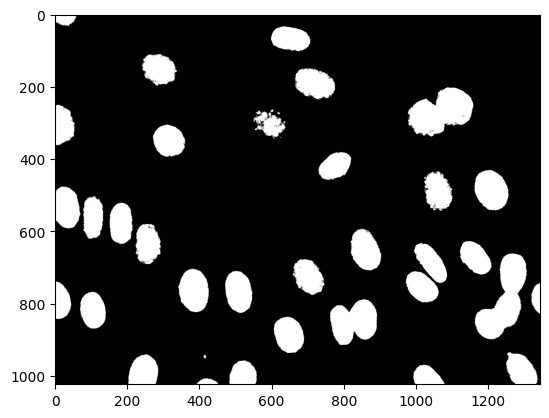

In [8]:
img5 = img8
a = img5 >= min_thres
b = img5 < min_thres 

img5[a]=1
img5[b]=0

plt.imshow(img5,cmap ='gray')

**[Task 1.6.]()** Compute the Dice coefficient:

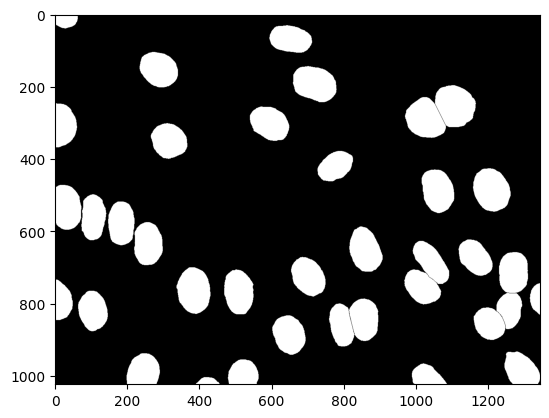

In [10]:
gt = plt.imread('data/NIH3T3/gt/0.png')
plt.imshow(gt, cmap='gray')


In [11]:
def Dicefun(G,H):
    D0 = 2*G*H
    D1 = D0.sum()
    D2 = G.sum()+H.sum()
    return D1/D2

Dicefun(img5,gt)

0.8943783223933183